In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import os

In [8]:
def neat(df):
    to_return = df.rename(columns={' t_RCD (Row to column command delay)': 't_RCD (Row to column command delay) (ns)',
                              ' t_RAS (Row access strobe latency)': 't_RAS (Row access strobe latency) (ns)', 
                              ' t_RC (Row cycle)': 't_RC (Row cycle) (ns)', ' t_CAS (Column access strobe latency)': 't_CAS (Column access strobe latency) (ns)',
                              ' t_RP (Row precharge latency)': 't_RP (Row precharge latency) (ns)',
                              ' t_RRD (Row activation to row activation delay)': 't_RRD (Row activation to row activation delay) (ns)',
                              ' Activation energy': 'Activation energy (nJ)', ' Read energy': 'Read energy (nJ)', ' Write energy': 'Write energy (nJ)',
                              ' Precharge energy': 'Precharge energy (nJ)', ' DRAM core area': 'DRAM core area (mm2)', 
                              ' DRAM area per die': 'DRAM area per die (mm2)', ' Area efficiency': 'Area efficiency (%)', ' DRAM die width': 'DRAM die width (mm)',
                              ' DRAM die height': 'DRAM die height (mm)', ' TSV area overhead': 'TSV area overhead (mm2)', ' TSV latency overhead': 'TSV latency overhead (ns)',
                              ' TSV energy overhead per access': 'TSV energy overhead per access (nJ)'})

    for col in to_return.columns:
        if col == 'DRAM core area (mm2)' or col == 'DRAM area per die (mm2)' or col == 'TSV area overhead (mm2)':
            to_return[col] = to_return[col].replace("mm2", "", regex=True)
        else:
            to_return[col] = to_return[col].replace("[a-z_A-Z%]", "", regex=True)
        if col == 'Name':
            to_return['Name'] = to_return['Name'].str.strip('.').astype(float)
            continue
        else:
            to_return[col].astype(float)
    to_return = to_return.sort_values(by='Name', ignore_index=True)
    
    return to_return

In [13]:
# load list of files
files = []
for file in os.listdir('csv'):
    if '.csv' in file:
        files.append(os.path.join('csv', file))

In [14]:
# single plot
# cols = df.columns

# toggle column and csv file
# c_i = 1 # 1 - 18
# f_i = 1 # 0 - len(files)

# df = neat(pd.read_csv(files[f_i]))
# plt.plot('Name', cols[c_i], data=df)
# plt.xlabel(files[f_i].replace('_', ' ').strip('.csv'))
# plt.ylabel(cols[c_i])
# plt.title(files[f_i].replace('_', ' ').strip('.csv') + ' vs. ' + re.sub(r"\(.*\)", "", cols[c_i]))

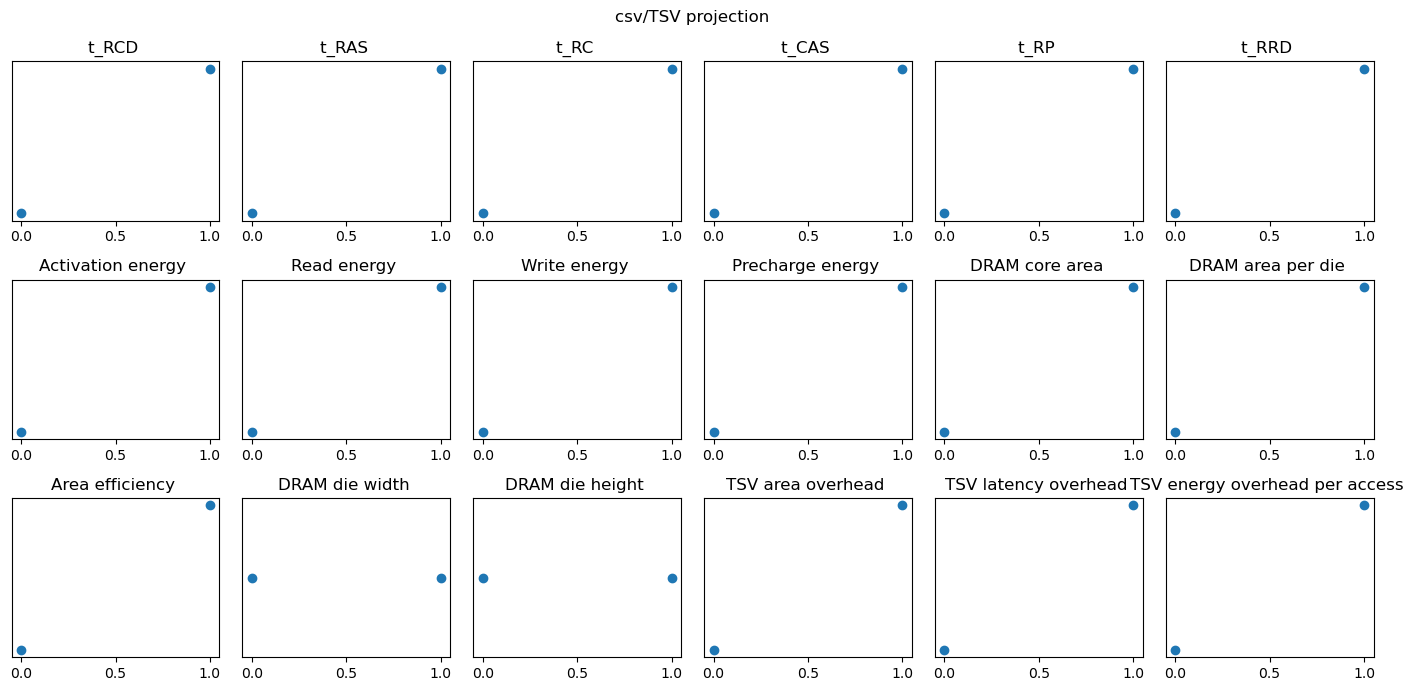

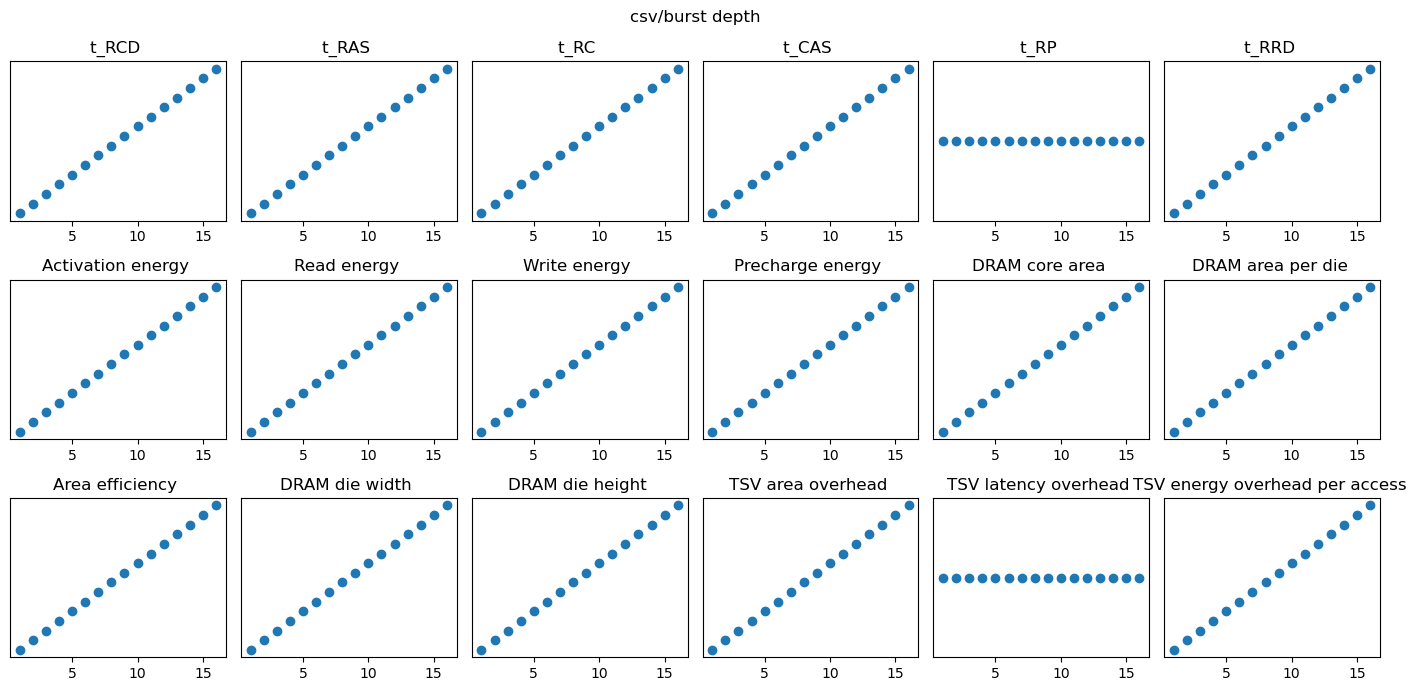

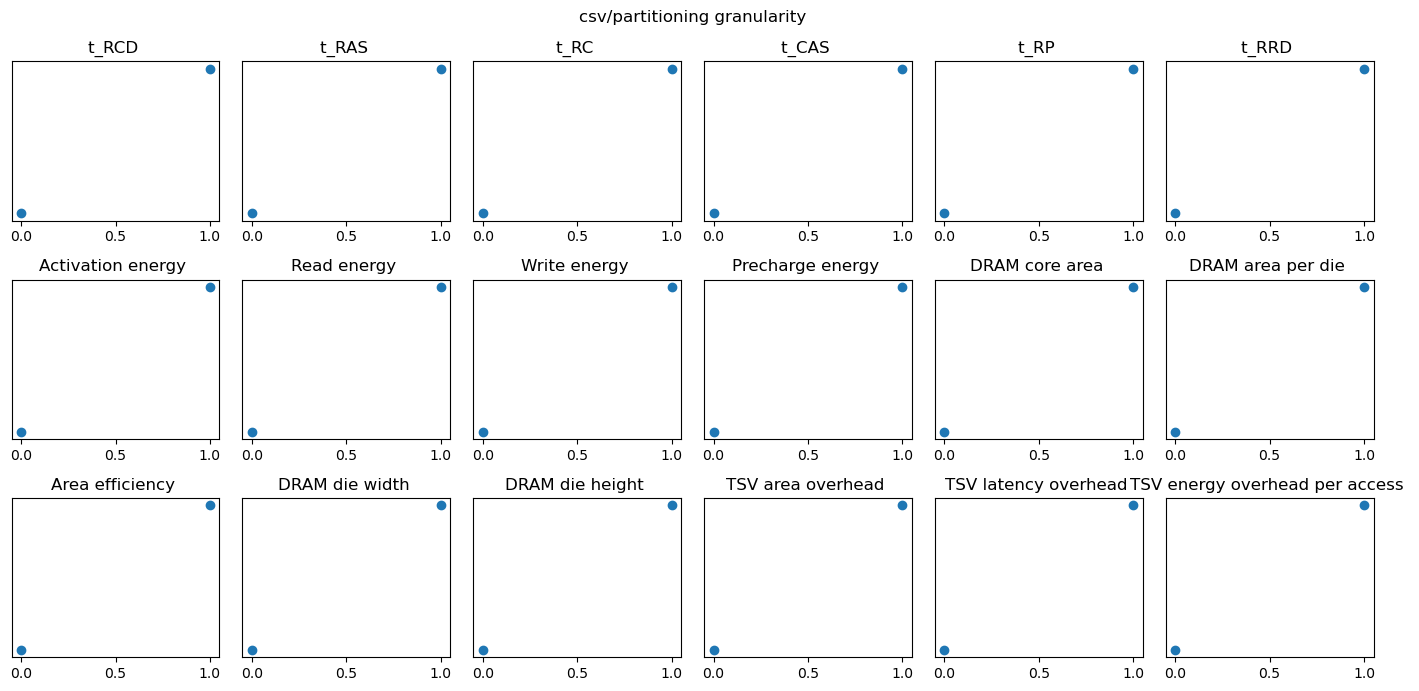

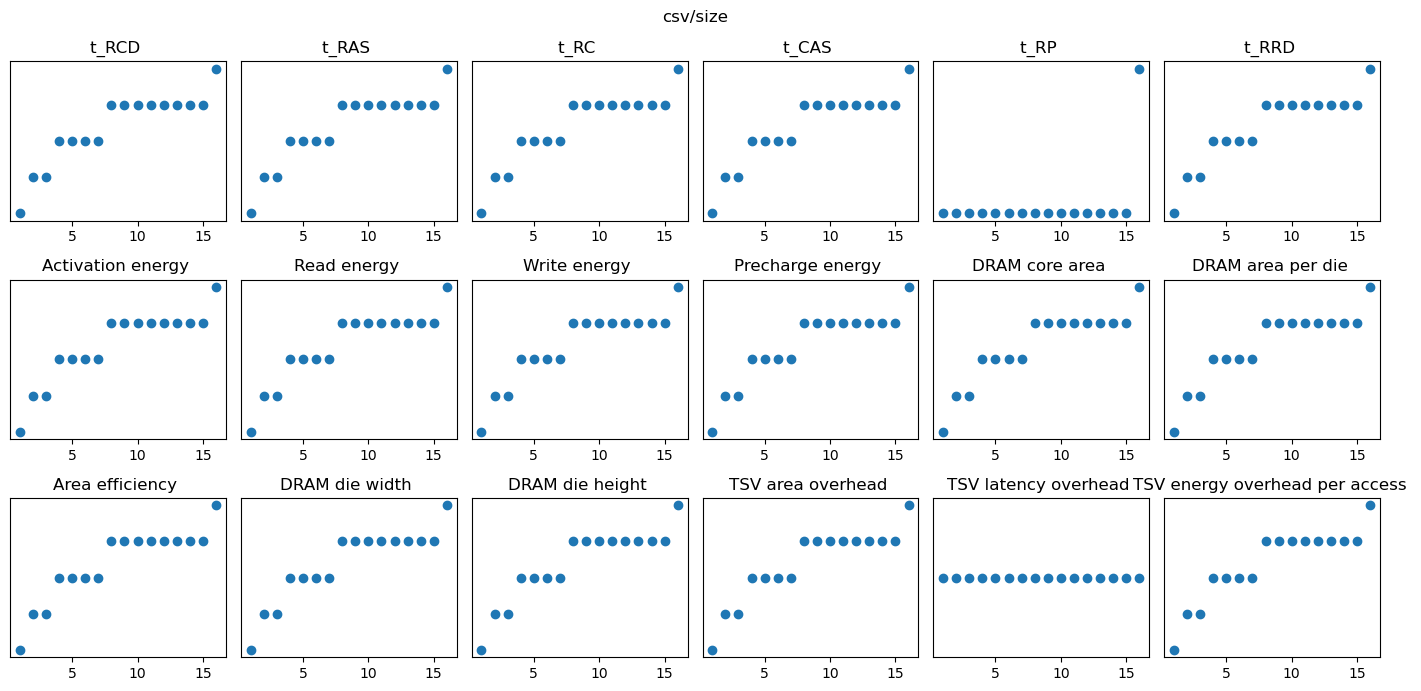

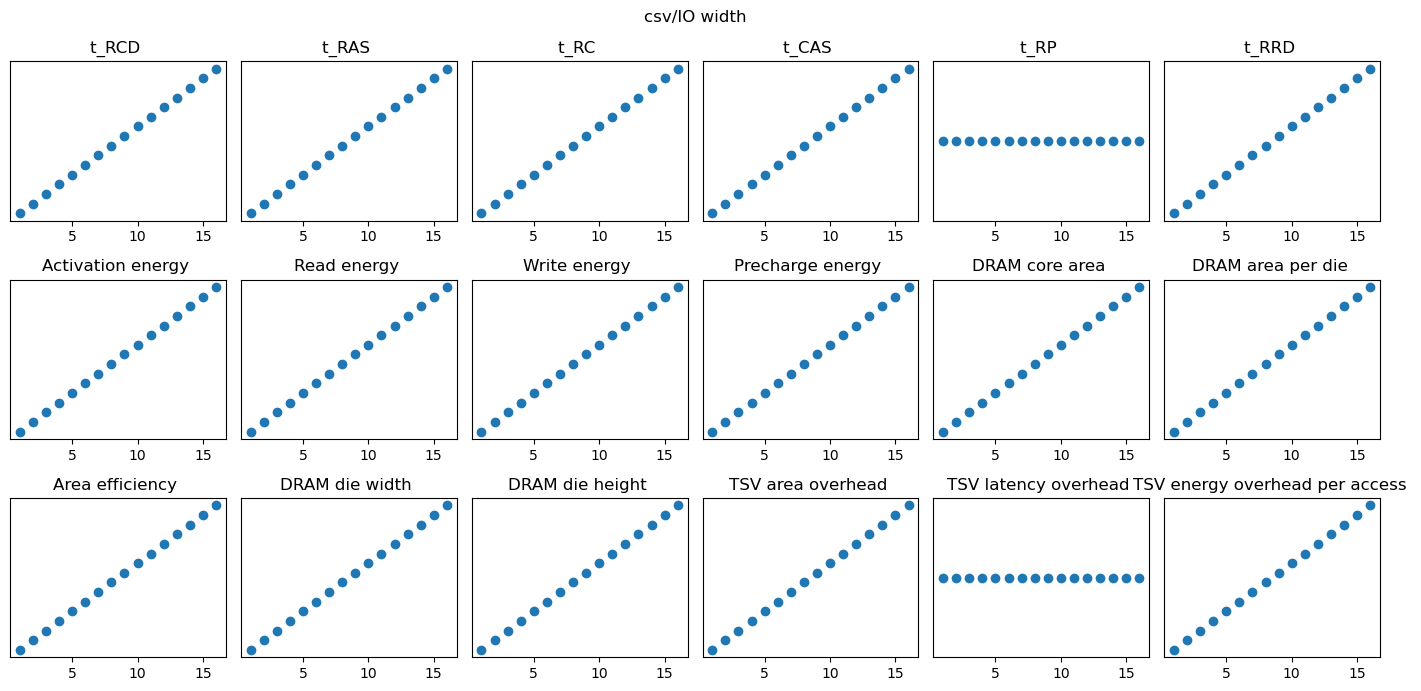

csv/stacked die count vs. TSV area overhead 
csv/stacked die count vs. TSV latency overhead 
csv/stacked die count vs. TSV energy overhead per access 


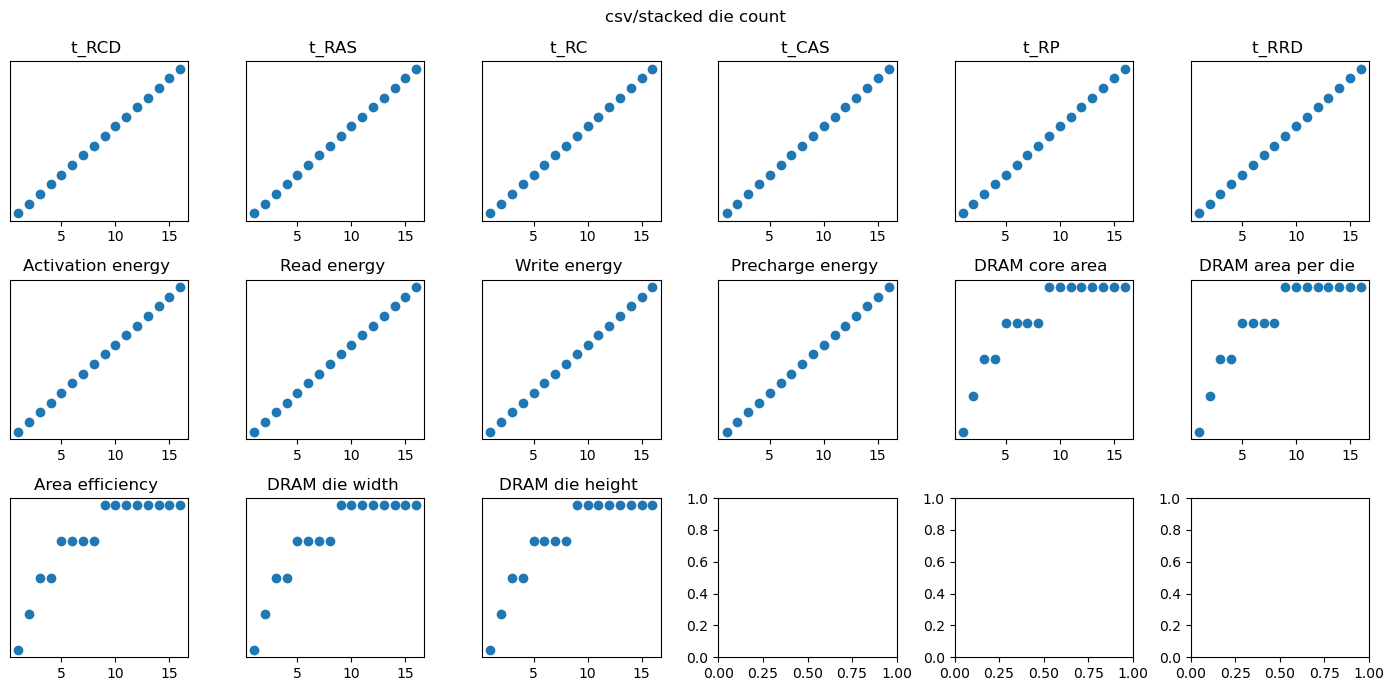

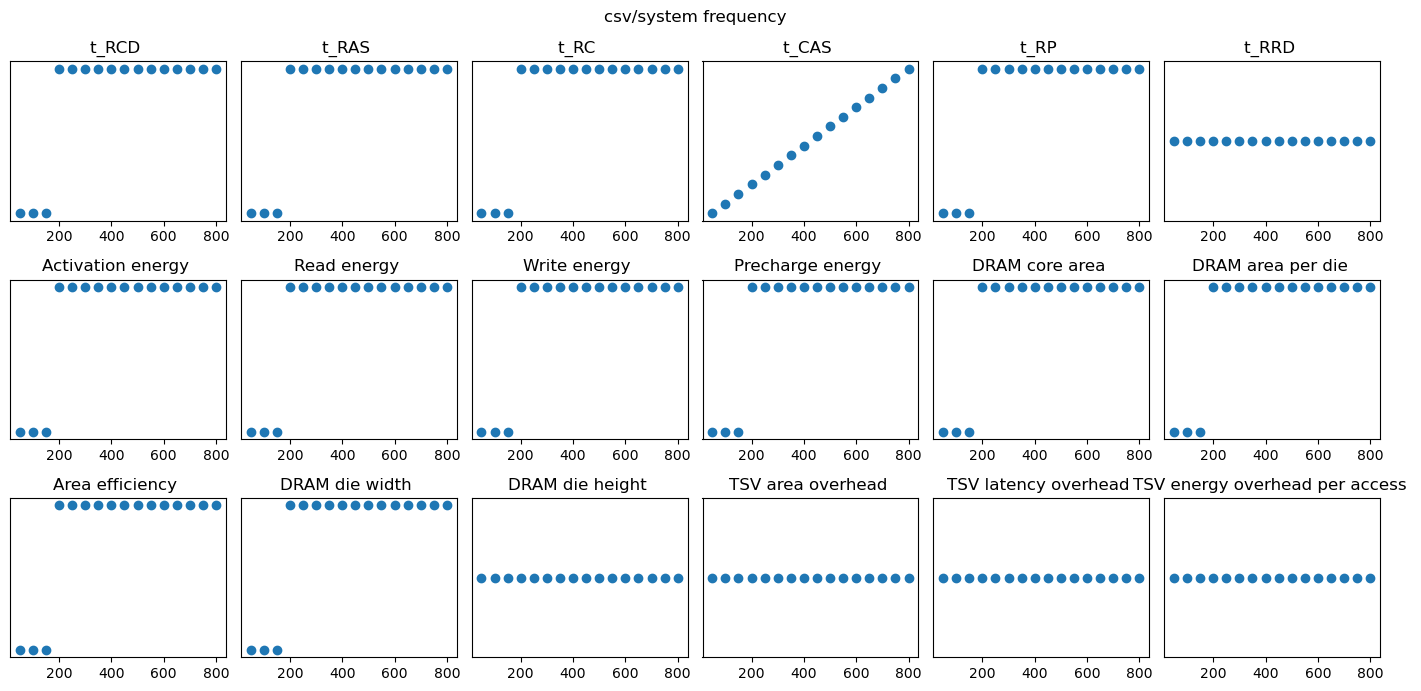

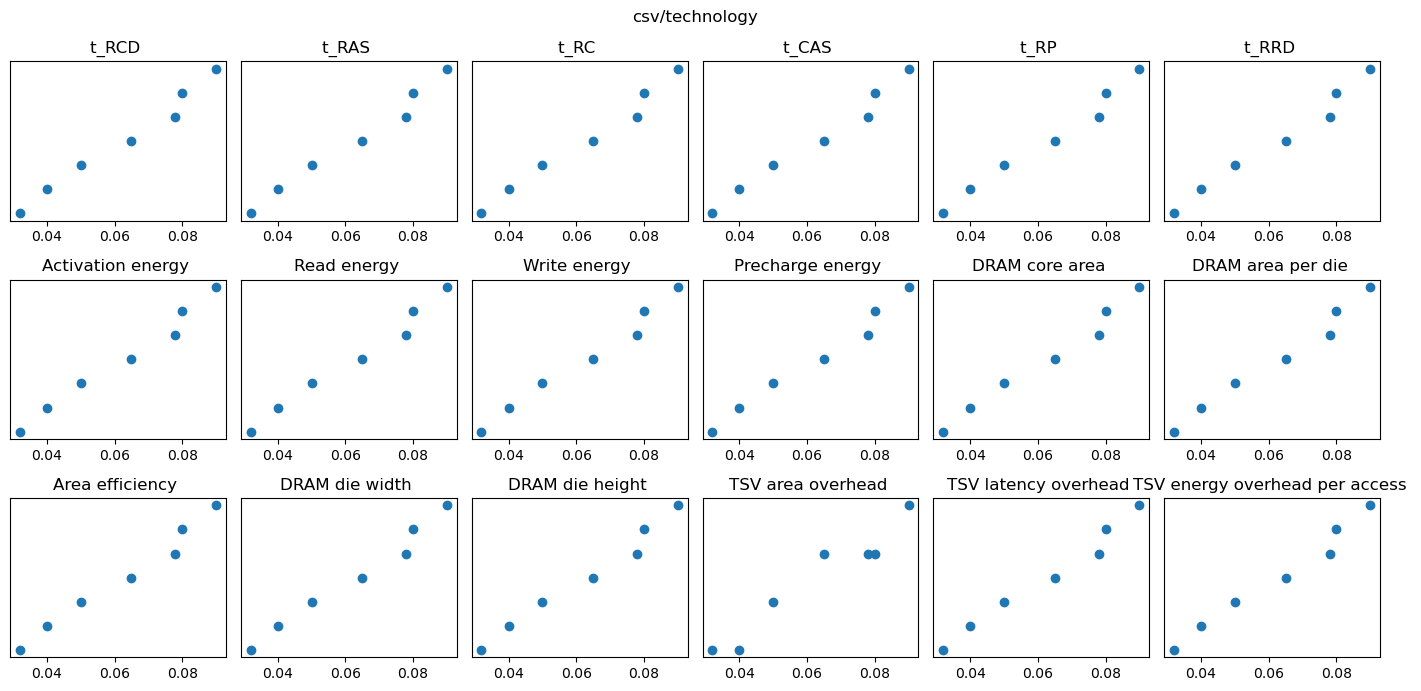

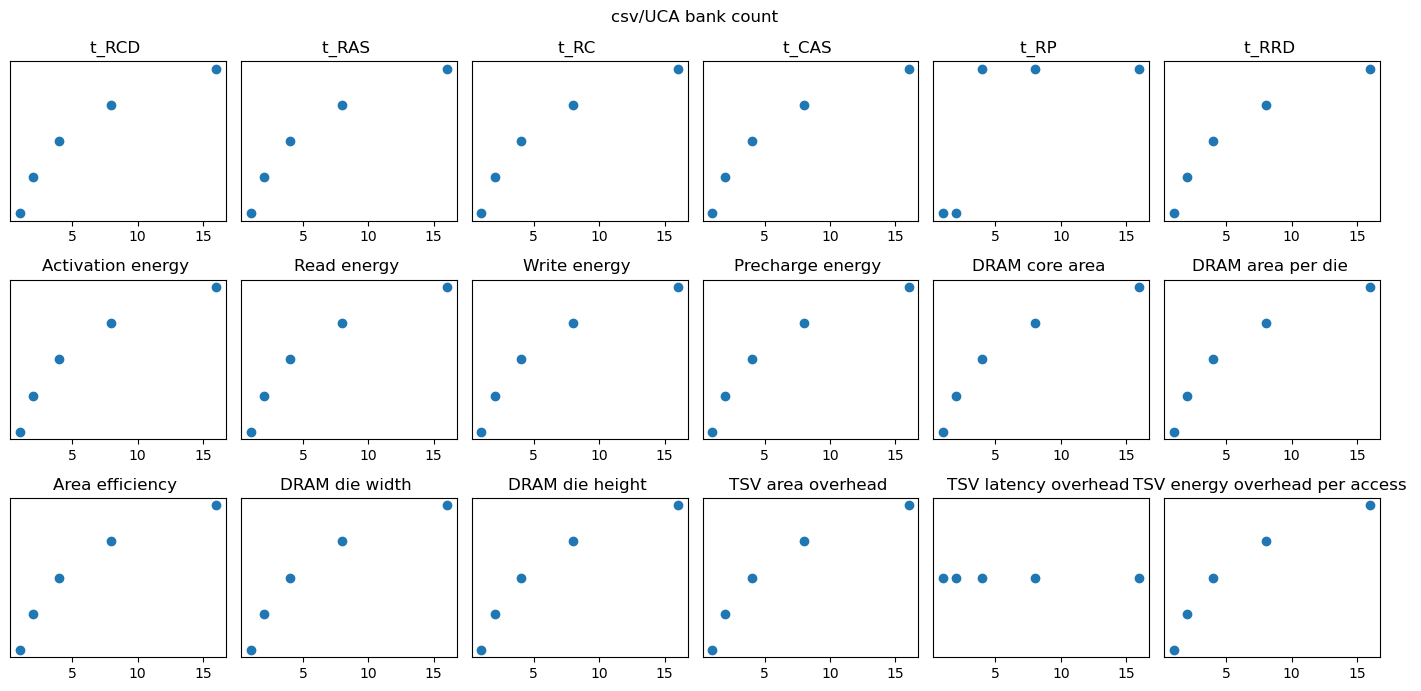

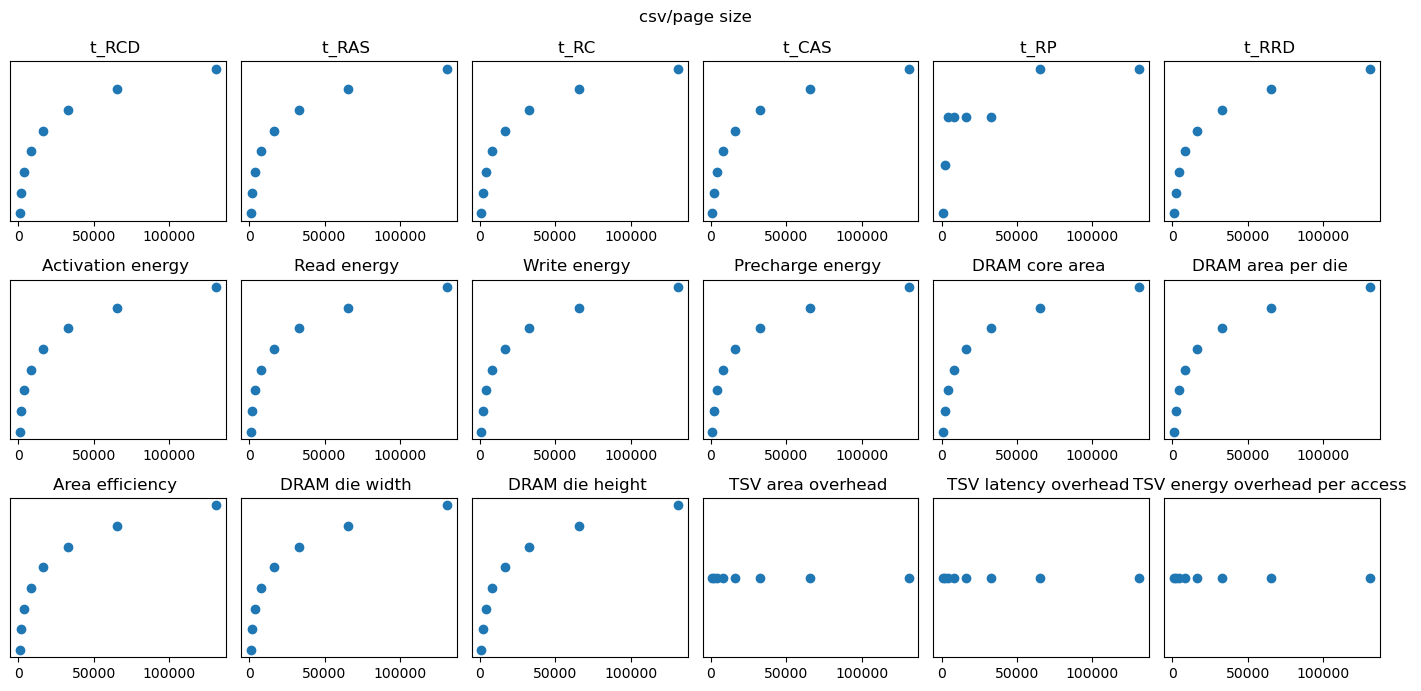

In [19]:
# all plots
for f_i in range(0, len(files)):
    c_i = 1
    df = neat(pd.read_csv(files[f_i]))
    cols = df.columns
    
    fig, axs = plt.subplots(3, 6, figsize=(14, 7))
    fig.suptitle(files[f_i].replace('_', ' ').replace('.csv', ''))
    
    for r in range(0, 3):
        for c in range (0, 6):
            try:
                axs[r][c].scatter('Name', cols[c_i], data=df)
                axs[r][c].set_yticks([])
                axs[r][c].set_title(re.sub(r"\(.*\)", "", cols[c_i]))
            except:
                print(files[f_i].replace('_', ' ').replace('.csv', '') + ' vs. ' + re.sub(r"\(.*\)", "", cols[c_i]))
            c_i += 1
            
    fig.tight_layout()
    plt.show()
    plt.close()

In [26]:
f = neat(pd.read_csv('csv/burst_depth.csv'))
len(f.columns)

19